In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.layers import Dense,Flatten, Conv2D, merge
from keras.layers import MaxPooling2D, Dropout
from keras.utils import np_utils, print_summary
import tensorflow as tf
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
import pickle
from keras.callbacks import TensorBoard
import keras
from keras.layers.core import Reshape

Using TensorFlow backend.


In [2]:
def keras_model(image_x, image_y):
    num_of_classes = 40
    model = Sequential()
    model.add(Conv2D(64, (5, 5), input_shape=(image_x,image_y,1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
    model.add(Conv2D(64, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(num_of_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    filepath = "QuickDraw.h5"
    checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
    callbacks_list = [checkpoint]

    return model, callbacks_list

In [3]:
def loadFromPickle(path):
    with open(path + "features", "rb") as f:
        features = np.array(pickle.load(f))
    with open(path + "labels", "rb") as f:
        labels = np.array(pickle.load(f))

    return features, labels

In [4]:
def augmentData(features, labels):
    features = np.append(features, features[:, :, ::-1], axis=0)
    labels = np.append(labels, -labels, axis=0)
    return features, labels

In [5]:
def prepress_labels(labels):
    labels = np_utils.to_categorical(labels)
    return labels

In [6]:
path = 'I:/Deep Learning/DeepProject/'
features, labels = loadFromPickle(path + 'DataSet/CNN_DataSet/')
features, labels = shuffle(features, labels)
labels=prepress_labels(labels)
train_x, test_x, train_y, test_y = train_test_split(features, labels, random_state=0, test_size=0.1)
train_x = train_x.reshape(train_x.shape[0], 28, 28, 1)
test_x = test_x.reshape(test_x.shape[0], 28, 28, 1)

In [7]:
model, callbacks_list = keras_model(28,28)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          102464    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
__________

In [11]:
history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=10, batch_size=128, shuffle=True, callbacks=[TensorBoard(log_dir="QuickDraw")])

Train on 1800000 samples, validate on 200000 samples
Epoch 1/10
1800000/1800000 [==============================] - 188s 105us/step - loss: 0.8405 - acc: 0.7926 - val_loss: 0.6784 - val_acc: 0.8225
Epoch 2/10
1800000/1800000 [==============================] - 187s 104us/step - loss: 0.8378 - acc: 0.7929 - val_loss: 0.6681 - val_acc: 0.8274
Epoch 3/10
1800000/1800000 [==============================] - 187s 104us/step - loss: 0.8332 - acc: 0.7943 - val_loss: 0.6649 - val_acc: 0.8263
Epoch 4/10
1800000/1800000 [==============================] - 191s 106us/step - loss: 0.8310 - acc: 0.7951 - val_loss: 0.6637 - val_acc: 0.8262
Epoch 5/10
1800000/1800000 [==============================] - 190s 106us/step - loss: 0.8268 - acc: 0.7962 - val_loss: 0.6799 - val_acc: 0.8232
Epoch 6/10
1800000/1800000 [==============================] - 193s 107us/step - loss: 0.8253 - acc: 0.7962 - val_loss: 0.6694 - val_acc: 0.8255
Epoch 7/10
1800000/1800000 [==============================] - 194s 108us/step - los

In [ ]:
# model.save(path + 'models/' + 'QuickDraw.h5')

In [9]:
import matplotlib.pyplot as plt
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["acc"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_acc"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history)

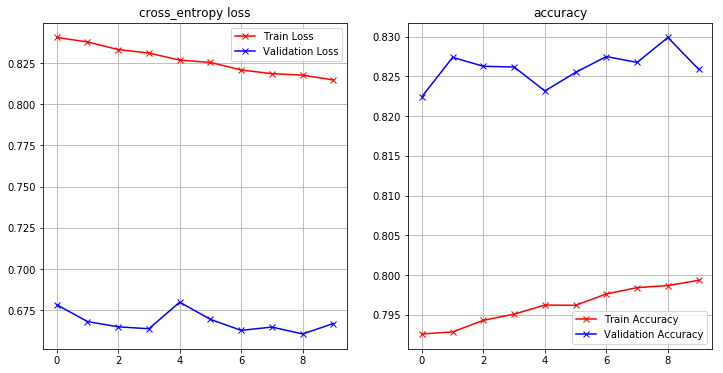

In [12]:
plot_loss_accuracy(history)

In [26]:
c5 = Sequential()
c5.add(Conv2D(64, (5, 5), input_shape=(28,28,1), activation='relu'))
c5.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
c5.layers[1].output_shape

(None, 12, 12, 64)

In [27]:
c3 = Sequential()
c3.add(Conv2D(64, (3, 3), input_shape=(28,28,1), activation='relu'))
c3.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
c3.layers[1].output_shape

(None, 13, 13, 64)

In [28]:
c1 = Sequential()
c1.add(Conv2D(64, (1, 1), input_shape=(28,28,1), activation='relu'))
c1.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
c1.layers[1].output_shape

(None, 14, 14, 64)

In [33]:
shape = c5.output_shape
shape_subset = (shape[1],shape[2],64)
c5.add(Reshape(shape_subset))
c3.add(Reshape(shape_subset))
c1.add(Reshape(shape_subset))

ValueError: total size of new array must be unchanged

In [31]:
out = Sequential()
out.add(Flatten())
out.add(Dense(512, activation='relu'))
out.add(Dropout(0.6))
out.add(Dense(128, activation='relu'))
out.add(Dropout(0.6))
out.add(Dense(5, activation='softmax'))

In [23]:
model_1 = keras.models.Model(input=[c1,c3,c5], outputs=out)

C:\Users\ittik\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=<keras.eng..., inputs=[<keras.en...)`
  """Entry point for launching an IPython kernel.


ValueError: Input tensors to a Model must come from `keras.layers.Input`. Received: <keras.engine.sequential.Sequential object at 0x00000262AC0DAB00> (missing previous layer metadata).